# Data Science Salary Prediction model

Importing essentials libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pandas as pd
from fuzzywuzzy import fuzz
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [4]:
job_posting = pd.read_csv('job_postings.csv', parse_dates=True)
job_posting.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite


In [5]:
job_posting.shape

(12217, 15)

In [6]:
job_posting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_link             12217 non-null  object
 1   last_processed_time  12217 non-null  object
 2   last_status          12217 non-null  object
 3   got_summary          12217 non-null  object
 4   got_ner              12217 non-null  object
 5   is_being_worked      12217 non-null  object
 6   job_title            12217 non-null  object
 7   company              12217 non-null  object
 8   job_location         12216 non-null  object
 9   first_seen           12217 non-null  object
 10  search_city          12217 non-null  object
 11  search_country       12217 non-null  object
 12  search_position      12217 non-null  object
 13  job_level            12217 non-null  object
 14  job_type             12217 non-null  object
dtypes: object(15)
memory usage: 1.4+ MB


In [7]:
job_posting.duplicated().sum()

0

In [8]:
job_skill = pd.read_csv('job_skills.csv')
job_skill.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


In [9]:
job_skill.shape

(12217, 2)

In [10]:
job_skill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job_link    12217 non-null  object
 1   job_skills  12212 non-null  object
dtypes: object(2)
memory usage: 191.0+ KB


In [11]:
job_summary = pd.read_csv("job_summary.csv")
job_summary.head()

,job_link,job_summary
0,https://www.linkedin.com/jobs/view/senior-mach...,Company Description\nJobs for Humanity is part...
1,https://www.linkedin.com/jobs/view/principal-s...,Who We Are\nAurora (Nasdaq: AUR) is delivering...
2,https://www.linkedin.com/jobs/view/senior-etl-...,"Location: New York City, NY\nPosition Summary\..."
3,https://www.linkedin.com/jobs/view/senior-data...,Responsibilities:\nCandidate must have signifi...
4,https://www.linkedin.com/jobs/view/lead-data-e...,Dice is the leading career destination for tec...


In [12]:
job_summary.shape

(12217, 2)

In [13]:
job_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job_link     12217 non-null  object
 1   job_summary  12217 non-null  object
dtypes: object(2)
memory usage: 191.0+ KB


In [14]:
# Merge three tables into one
job_df = pd.merge(job_posting,job_skill, on = "job_link")
job_df = pd.merge(job_df, job_summary, on= "job_link")

In [15]:
job_df.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ...",Company Description\nJobs for Humanity is part...
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",Who We Are\nAurora (Nasdaq: AUR) is delivering...
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,"ETL, Data Integration, Data Transformation, Da...","Location: New York City, NY\nPosition Summary\..."
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,"Data Lakes, Data Bricks, Azure Data Factory Pi...",Responsibilities:\nCandidate must have signifi...
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",Dice is the leading career destination for tec...


In [16]:
job_df.shape

(12217, 17)

In [17]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_link             12217 non-null  object
 1   last_processed_time  12217 non-null  object
 2   last_status          12217 non-null  object
 3   got_summary          12217 non-null  object
 4   got_ner              12217 non-null  object
 5   is_being_worked      12217 non-null  object
 6   job_title            12217 non-null  object
 7   company              12217 non-null  object
 8   job_location         12216 non-null  object
 9   first_seen           12217 non-null  object
 10  search_city          12217 non-null  object
 11  search_country       12217 non-null  object
 12  search_position      12217 non-null  object
 13  job_level            12217 non-null  object
 14  job_type             12217 non-null  object
 15  job_skills           12212 non-null  object
 16  job_

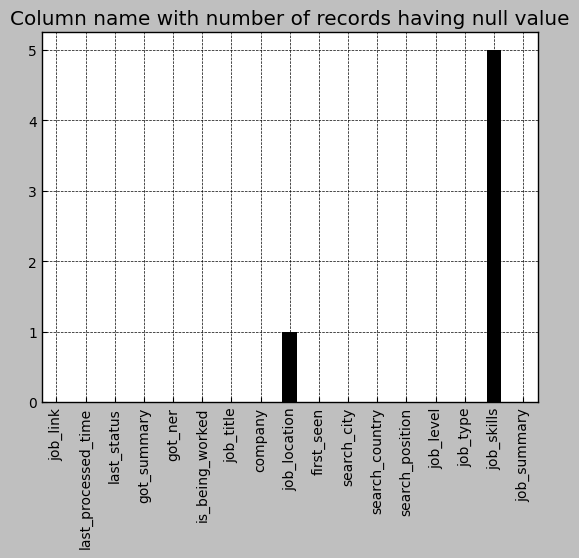

In [179]:
job_df.isna().sum().plot(kind="bar")
plt.title("Column name with number of records having null value")
plt.show()

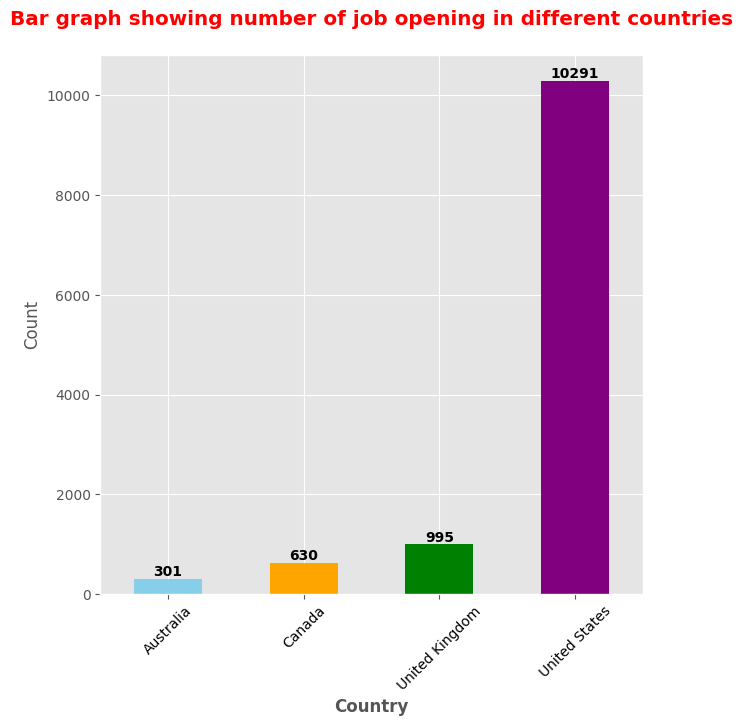

In [19]:
# Count the number of jobs opening with respect t countries
country = job_df['search_country'].value_counts().sort_index()

#Let's explore job opening with respect to different countries
plt.style.use('ggplot')
plt.figure(figsize=(7,7))

country.plot(kind='bar', color =['skyblue', 'orange', 'green', 'purple'])

for i, count in enumerate(country):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', weight="bold")
plt.xlabel("Country", weight="bold")
plt.ylabel("Count")
plt.xticks(rotation = 45, color ='black')
plt.title("Bar graph showing number of job opening in different countries\n", weight="bold", color="red", )
plt.show()

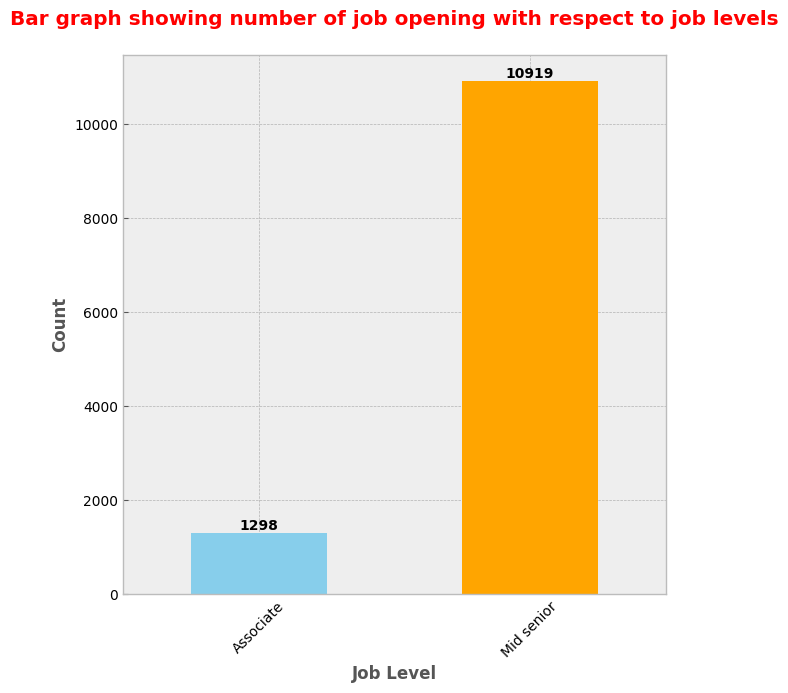

In [20]:
joblevel = job_df['job_level'].value_counts().sort_index()
#Let's explore job opening for differnt job levels
plt.style.use('bmh')
plt.figure(figsize=(7,7))
joblevel.plot(kind='bar', color =['skyblue', 'orange'])

for i, count in enumerate(joblevel):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', weight="bold")
plt.xlabel("Job Level", weight="bold")
plt.ylabel("Count", weight="bold")
plt.xticks(rotation = 45, color="black")
plt.yticks(color="black")
plt.title("Bar graph showing number of job opening with respect to job levels\n", weight="bold", color="red", )
plt.show()

In [21]:
job_limit_df = job_df.drop(columns=["last_processed_time", "last_status", "got_summary", "got_ner", "is_being_worked", "first_seen"])
job_limit_df

,job_link,job_title,company,job_location,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary
0,https://www.linkedin.com/jobs/view/senior-mach...,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ...",Company Description\nJobs for Humanity is part...
1,https://www.linkedin.com/jobs/view/principal-s...,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",Who We Are\nAurora (Nasdaq: AUR) is delivering...
2,https://www.linkedin.com/jobs/view/senior-etl-...,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",Middletown,United States,Technical Support Specialist,Associate,Onsite,"ETL, Data Integration, Data Transformation, Da...","Location: New York City, NY\nPosition Summary\..."
3,https://www.linkedin.com/jobs/view/senior-data...,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",Lebanon,United States,Architect,Mid senior,Onsite,"Data Lakes, Data Bricks, Azure Data Factory Pi...",Responsibilities:\nCandidate must have signifi...
4,https://www.linkedin.com/jobs/view/lead-data-e...,Lead Data Engineer,Dice,"Plano, TX",McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",Dice is the leading career destination for tec...
...,...,...,...,...,...,...,...,...,...,...,...
12212,https://uk.linkedin.com/jobs/view/data-reporti...,"Data Reporting Manager, FOOTBALL ASSOCIATION",Guardian Jobs,"Wembley, England, United Kingdom",High Wycombe,United Kingdom,Manager Forms Analysis,Mid senior,Onsite,"Dashboard development, Reporting, Power BI, SQ...","FOOTBALL ASSOCIATION\nMake an impact, on and o..."
12213,https://www.linkedin.com/jobs/view/corporate-a...,Corporate AML Alert Investigation Specialist,"Glacier Bancorp, Inc.","Kalispell, MT",Montana,United States,Teller,Mid senior,Onsite,"Investigation, Antimoney laundering, Fraud, Ba...",About The Role\nPlease note: review of applica...
12214,https://www.linkedin.com/jobs/view/senior-data...,Senior Data Scientist,Highnote,"San Francisco, CA",San Rafael,United States,Mathematician,Mid senior,Onsite,"Data Science, Quantitative Modeling, SQL, Data...",About Highnote\nFounded in 2020 by a team of l...
12215,https://www.linkedin.com/jobs/view/senior-data...,Senior Data Engineer,CompSource Mutual Insurance Company,"Oklahoma City, OK",Arcadia,United States,Protection Engineer,Mid senior,Onsite,"Data Engineering, Data Quality, SQL, Python, T...",Are you an experienced data engineer in Oklaho...


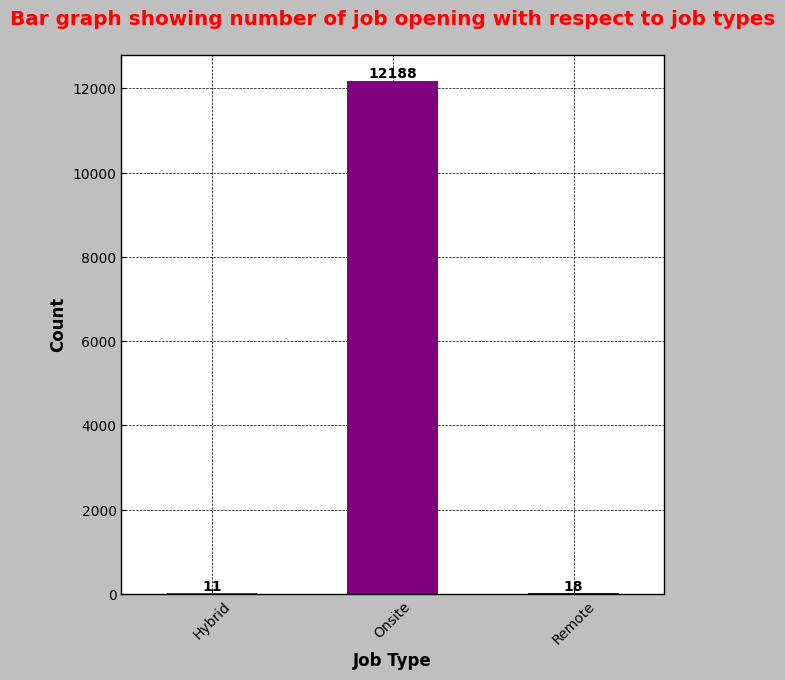

In [182]:
jobtype = job_df['job_type'].value_counts().sort_index()

#Let's explore job opening for differnt job types
plt.style.use('grayscale')
plt.figure(figsize=(7,7))
jobtype.plot(kind='bar', color =['green', 'purple', "blue"])

for i, count in enumerate(jobtype):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', weight="bold")
plt.xlabel("Job Type", weight="bold")
plt.ylabel("Count", weight="bold")
plt.xticks(rotation = 45, color="black")
plt.yticks(color="black")
plt.title("Bar graph showing number of job opening with respect to job types\n", weight="bold", color="red", )
plt.show()

In [23]:
salary_with_job_summary = job_summary

In [24]:
#Define regular expression pattern to extract salary ranges from job summary
def calculate_avg_salary(summary):
    patterns =  [r'\$(?P<lower>[\d,]+) - \$(?P<upper>[\d,]+)', r'\$(?P<lower>[\d,]+)-\$(?P<upper>[\d,]+)', r'\$(?P<lower>[\d,]+)- \$(?P<upper>[\d,]+)']
    salaries = []
    for pattern in patterns:
        matches = re.finditer(pattern, summary)
        if matches:
            for match in matches:
                lower = int(match.group('lower').replace(',', ''))
                upper = int(match.group('upper').replace(',', '')) if 'upper' in match.groupdict() else lower
                salaries.extend(range(lower, upper + 1))
        # Calculate average salary
    if salaries:
        avg = round(sum(salaries) / len(salaries), 2)
        return avg
    else:
        return None

# Apply the function to the 'Summary' column to calculate average salary
salary_with_job_summary['Average_Salary'] = salary_with_job_summary['job_summary'].apply(calculate_avg_salary)

# Display the DataFrame with average salary
salary_with_job_summary

,job_link,job_summary,Average_Salary
0,https://www.linkedin.com/jobs/view/senior-mach...,Company Description\nJobs for Humanity is part...,173350.0
1,https://www.linkedin.com/jobs/view/principal-s...,Who We Are\nAurora (Nasdaq: AUR) is delivering...,321000.0
2,https://www.linkedin.com/jobs/view/senior-etl-...,"Location: New York City, NY\nPosition Summary\...",NaN
3,https://www.linkedin.com/jobs/view/senior-data...,Responsibilities:\nCandidate must have signifi...,NaN
4,https://www.linkedin.com/jobs/view/lead-data-e...,Dice is the leading career destination for tec...,NaN
...,...,...,...
12212,https://uk.linkedin.com/jobs/view/data-reporti...,"FOOTBALL ASSOCIATION\nMake an impact, on and o...",NaN
12213,https://www.linkedin.com/jobs/view/corporate-a...,About The Role\nPlease note: review of applica...,NaN
12214,https://www.linkedin.com/jobs/view/senior-data...,About Highnote\nFounded in 2020 by a team of l...,175000.0
12215,https://www.linkedin.com/jobs/view/senior-data...,Are you an experienced data engineer in Oklaho...,NaN


In [25]:
salary_data = job_summary
salary_data

,job_link,job_summary,Average_Salary
0,https://www.linkedin.com/jobs/view/senior-mach...,Company Description\nJobs for Humanity is part...,173350.0
1,https://www.linkedin.com/jobs/view/principal-s...,Who We Are\nAurora (Nasdaq: AUR) is delivering...,321000.0
2,https://www.linkedin.com/jobs/view/senior-etl-...,"Location: New York City, NY\nPosition Summary\...",NaN
3,https://www.linkedin.com/jobs/view/senior-data...,Responsibilities:\nCandidate must have signifi...,NaN
4,https://www.linkedin.com/jobs/view/lead-data-e...,Dice is the leading career destination for tec...,NaN
...,...,...,...
12212,https://uk.linkedin.com/jobs/view/data-reporti...,"FOOTBALL ASSOCIATION\nMake an impact, on and o...",NaN
12213,https://www.linkedin.com/jobs/view/corporate-a...,About The Role\nPlease note: review of applica...,NaN
12214,https://www.linkedin.com/jobs/view/senior-data...,About Highnote\nFounded in 2020 by a team of l...,175000.0
12215,https://www.linkedin.com/jobs/view/senior-data...,Are you an experienced data engineer in Oklaho...,NaN


In [26]:
#Define regular expression pattern to extract salary ranges from job summary
def calculate_average_salary(summary):
    patterns =  [r'\$(?P<lower>[\d,]+) - \$(?P<upper>[\d,]+)', r'\$(?P<lower>[\d,]+)-\$(?P<upper>[\d,]+)', r'\$(?P<lower>[\d,]+)- \$(?P<upper>[\d,]+)', r'\$(?P<lower>[\d,]+) -\$(?P<upper>[\d,]+)']
    salaries = []
    for pattern in patterns:
        matches = re.finditer(pattern, summary)
        if matches:
            for match in matches:
                lower = int(match.group('lower').replace(',', ''))
                upper = int(match.group('upper').replace(',', '')) if 'upper' in match.groupdict() else lower
                salaries.extend(range(lower, upper + 1))
        # Calculate average salary
    if salaries:
        avg = round(sum(salaries) / len(salaries), 2)
        if 15 < avg < 100:
            avg1 = avg * 5 * 8 * 52
            return avg1
        elif 100 < avg < 200:
            avg1 = avg * 1000
            return avg1
        elif 600< avg < 1200:
            avg1 = avg * 5 * 52
            return avg1
        elif 2000 < avg < 30000:
            avg1 = avg * 12
            return avg1
        elif avg < 10:
            return None
        else:
            return avg
    else:
        return None

# Apply the function to the 'Summary' column to calculate average salary
salary_data['Average_Salary'] = salary_data['job_summary'].apply(calculate_average_salary)

# Display the DataFrame with average salary
salary_data

,job_link,job_summary,Average_Salary
0,https://www.linkedin.com/jobs/view/senior-mach...,Company Description\nJobs for Humanity is part...,173350.0
1,https://www.linkedin.com/jobs/view/principal-s...,Who We Are\nAurora (Nasdaq: AUR) is delivering...,321000.0
2,https://www.linkedin.com/jobs/view/senior-etl-...,"Location: New York City, NY\nPosition Summary\...",NaN
3,https://www.linkedin.com/jobs/view/senior-data...,Responsibilities:\nCandidate must have signifi...,NaN
4,https://www.linkedin.com/jobs/view/lead-data-e...,Dice is the leading career destination for tec...,NaN
...,...,...,...
12212,https://uk.linkedin.com/jobs/view/data-reporti...,"FOOTBALL ASSOCIATION\nMake an impact, on and o...",NaN
12213,https://www.linkedin.com/jobs/view/corporate-a...,About The Role\nPlease note: review of applica...,NaN
12214,https://www.linkedin.com/jobs/view/senior-data...,About Highnote\nFounded in 2020 by a team of l...,175000.0
12215,https://www.linkedin.com/jobs/view/senior-data...,Are you an experienced data engineer in Oklaho...,NaN


In [27]:
salary_data[(salary_data['Average_Salary'] > 200000)].sort_values(by="Average_Salary")

,job_link,job_summary,Average_Salary
1094,https://www.linkedin.com/jobs/view/software-en...,Who we are\nAbout Stripe\nStripe is a financia...,200900.00
8933,https://www.linkedin.com/jobs/view/software-en...,Who we are\nAbout Stripe\nStripe is a financia...,200900.00
11209,https://ca.linkedin.com/jobs/view/software-eng...,Who we are\nAbout Stripe\nStripe is a financia...,200900.00
10644,https://www.linkedin.com/jobs/view/senior-soft...,Our new global headquarters is conveniently lo...,202000.00
1872,https://www.linkedin.com/jobs/view/computation...,Our Mission\nTo restore cell health and resili...,202114.86
...,...,...,...
11469,https://www.linkedin.com/jobs/view/vp-engineer...,A Bit About Us\nDo you want to join one of the...,320000.00
1,https://www.linkedin.com/jobs/view/principal-s...,Who We Are\nAurora (Nasdaq: AUR) is delivering...,321000.00
10278,https://www.linkedin.com/jobs/view/senior-prod...,Senior Product Manager - Data Governance - Agi...,345627.50
10456,https://www.linkedin.com/jobs/view/principal-m...,My client is a leading firm at the intersectio...,450000.00


In [28]:
salary_data['job_summary'].loc[1094]

'Who we are\nAbout Stripe\nStripe is a financial infrastructure platform for businesses. Millions of companies—from the world’s largest enterprises to the most ambitious startups—use Stripe to accept payments, grow their revenue, and accelerate new business opportunities. Our mission is to increase the GDP of the internet, and we have a staggering amount of work ahead. That means you have an unprecedented opportunity to put the global economy within everyone’s reach while doing the most important work of your career.\nAbout The Team\nStripe is the best software platform for running an internet business. We handle billions of dollars every year for hundreds of thousands of businesses around the world. One third of Americans bought something on Stripe in the last year.\nWith all this data, the Growth Data Engineering team is looking for talented data-minded engineers to help us manage business critical data leveraged across the entire organization. If you are passionate about data, excit

In [29]:
uk = job_limit_df[job_limit_df['search_country'] == "United Kingdom"]
uk

,job_link,job_title,company,job_location,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary
15,https://uk.linkedin.com/jobs/view/data-enginee...,Data Engineer Manager,Energy Jobline,"Wolverhampton, England, United Kingdom",Telford,United Kingdom,Agricultural-Research Engineer,Mid senior,Onsite,"Data Engineering, Data Analytics, Data Warehou...",Join Our Team as a Data Engineering Manager!\n...
23,https://uk.linkedin.com/jobs/view/senior-data-...,"Senior Data Engineer - Azure, Python, Scala, S...",Templeton and Partners - Tech Recruitment,"London, England, United Kingdom",Slough,United Kingdom,Loading-Machine Tool-Setter,Mid senior,Onsite,"Azure, ADLS, Databricks, Stream Analytics, SQL...","Description\nURGENT! 12 Month Contract, full-t..."
31,https://uk.linkedin.com/jobs/view/senior-data-...,Senior Data Analyst,Huws Gray,"Awsworth, England, United Kingdom",Derby,United Kingdom,Mathematician,Mid senior,Onsite,"Data Analysis, Reporting, Team Management, Dat...",We are looking for a\nSenior Data Analyst\nto ...
37,https://uk.linkedin.com/jobs/view/data-quality...,"Data Quality Manager, FOOTBALL ASSOCIATION",Guardian Jobs,"Wembley, England, United Kingdom",Luton,United Kingdom,Supervisor Files,Mid senior,Onsite,"Data Quality Manager, Data Quality Standards, ...",FOOTBALL ASSOCIATION\nSet the bar for greatnes...
42,https://uk.linkedin.com/jobs/view/assitant-vic...,Assitant Vice President - Senior Database SME,MUFG,"London, England, United Kingdom",Slough,United Kingdom,Manager Forms Analysis,Mid senior,Onsite,"Database Platform Operations, Microsoft SQL Se...",Do you want your voice heard and your actions ...
...,...,...,...,...,...,...,...,...,...,...,...
12139,https://uk.linkedin.com/jobs/view/senior-backe...,Senior Backend and Cloud Engineer - Machine Le...,Scandit,"Aberdeen, Scotland, United Kingdom",Aberdeen,United Kingdom,Computer Programmer,Mid senior,Onsite,"Python, Django, Postgres, PubSub, Kubernetes, ...","At Scandit, we are developing smart data captu..."
12144,https://uk.linkedin.com/jobs/view/mechanical-s...,Mechanical Supervisor - MLC 2312,EJL Official Partner,"Harwell, England, United Kingdom",Oxford,United Kingdom,Plant Supervisor,Mid senior,Onsite,"Mechanical Engineering, Heating, Ventilation, ...","*Mechanical Supervisor*\n*Harwell, Didcot*\n*£..."
12199,https://uk.linkedin.com/jobs/view/lecturer-sen...,Lecturer/Senior Lecturer in Applied Data Scien...,Harper Adams University,"Shropshire, England, United Kingdom",Telford,United Kingdom,Instructor Modeling,Mid senior,Onsite,"Data Science, Statistics, Data Analysis, Model...",Lecturer/Senior Lecturer in Applied Data Scien...
12207,https://uk.linkedin.com/jobs/view/senior-lead-...,Senior/Lead Data Software Engineer,EPAM Systems,"London, England, United Kingdom",Slough,United Kingdom,Loading-Machine Tool-Setter,Associate,Onsite,"Data Platform Engineering, Data Products, Data...",Description\nAs a lead team member of the Data...


In [30]:
uk['job_summary'].loc[23]

"Description\nURGENT! 12 Month Contract, full-time, contract + likely extensions\nData Engineers with experience in Azure: ADLS, Databricks, Python, SQL, Scala, Spark-SQL\n£600 to £750 per day - inside ir35, Working Remotely - UK\nTempleton & Partners are looking for an experienced Data Engineer that can build, expand and optimise data and data pipeline architecture, as well as optimizing data flow and collection for cross functional teams.\nOur clients vision is to support the industry to co-create standards that provide trustworthy and transparent insights for our customers and others in the ecosystem on production and/or consumption of green energy products around the clock enabling participants to take informed actions on their journey to decarbonization.\nResponsibilities include:\nCreate and maintain optimal data pipeline architecture.\nAssemble data sets that meet functional / non-functional business requirements.\nIdentify, design, and implement internal process improvements: a

In [31]:
# Now lets apply calculate_average_salary in our main data frame job_limit_df
job_limit_df['Average_Salary ($)'] = job_limit_df['job_summary'].apply(calculate_average_salary)

In [32]:
job_limit_df.head()

,job_link,job_title,company,job_location,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary,Average_Salary ($)
0,https://www.linkedin.com/jobs/view/senior-mach...,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ...",Company Description\nJobs for Humanity is part...,173350.0
1,https://www.linkedin.com/jobs/view/principal-s...,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",Who We Are\nAurora (Nasdaq: AUR) is delivering...,321000.0
2,https://www.linkedin.com/jobs/view/senior-etl-...,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",Middletown,United States,Technical Support Specialist,Associate,Onsite,"ETL, Data Integration, Data Transformation, Da...","Location: New York City, NY\nPosition Summary\...",NaN
3,https://www.linkedin.com/jobs/view/senior-data...,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",Lebanon,United States,Architect,Mid senior,Onsite,"Data Lakes, Data Bricks, Azure Data Factory Pi...",Responsibilities:\nCandidate must have signifi...,NaN
4,https://www.linkedin.com/jobs/view/lead-data-e...,Lead Data Engineer,Dice,"Plano, TX",McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",Dice is the leading career destination for tec...,NaN


In [33]:
# Creating new dataframe with limited columns

final_data  = job_limit_df.drop(["job_title", "company", "search_position", "job_skills", "job_summary"], axis=1)

In [35]:
# More than 90% of job opening in the US. Let's look only within the US
data_US = final_data[final_data['search_country'] == "United States"]
data_US.head()

,job_link,job_location,search_city,search_country,job_level,job_type,Average_Salary ($)
0,https://www.linkedin.com/jobs/view/senior-mach...,"New Haven, CT",East Haven,United States,Mid senior,Onsite,173350.0
1,https://www.linkedin.com/jobs/view/principal-s...,"San Francisco, CA",El Cerrito,United States,Mid senior,Onsite,321000.0
2,https://www.linkedin.com/jobs/view/senior-etl-...,"New York, NY",Middletown,United States,Associate,Onsite,NaN
3,https://www.linkedin.com/jobs/view/senior-data...,"Harrisburg, PA",Lebanon,United States,Mid senior,Onsite,NaN
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Plano, TX",McKinney,United States,Mid senior,Onsite,NaN


In [36]:
# Lets do some EDA
data_US.shape

(10291, 7)

In [37]:
data_US.describe()

,Average_Salary ($)
count,1862.000000
mean,170680.430258
std,54986.279588
min,33280.000000
25%,133800.000000
50%,176800.000000
75%,211350.000000
max,450000.000000


In [38]:
data_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10291 entries, 0 to 12216
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_link            10291 non-null  object 
 1   job_location        10290 non-null  object 
 2   search_city         10291 non-null  object 
 3   search_country      10291 non-null  object 
 4   job_level           10291 non-null  object 
 5   job_type            10291 non-null  object 
 6   Average_Salary ($)  1862 non-null   float64
dtypes: float64(1), object(6)
memory usage: 643.2+ KB


In [39]:
data_US[data_US['job_location'].isnull()]

,job_link,job_location,search_city,search_country,job_level,job_type,Average_Salary ($)
9885,https://www.linkedin.com/jobs/view/sr-data-eng...,NaN,Alameda,United States,Mid senior,Onsite,169000.0


In [40]:
data_US['job_location'] = data_US['job_location'].fillna("Alameda, CA")

C:\Users\Binod Tandan\AppData\Local\Temp\ipykernel_16084\4069651237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_US['job_location'] = data_US['job_location'].fillna("Alameda, CA")


In [41]:
data_US['job_location'].isna().sum()

0

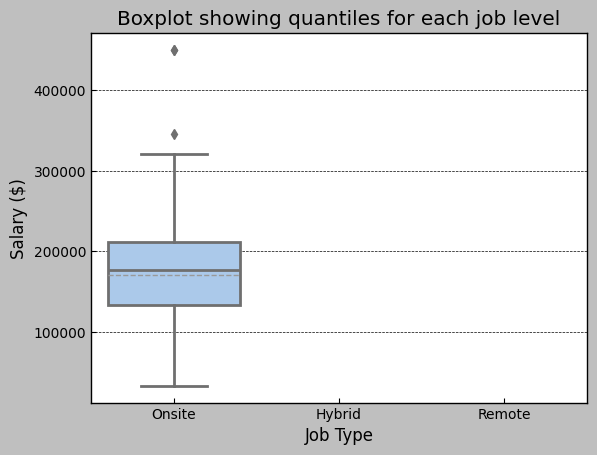

In [44]:
sns.boxplot(x='job_type', y="Average_Salary ($)", data=data_US, palette='pastel', showmeans=True, meanline=True)
plt.xlabel('Job Type')
plt.ylabel('Salary ($)')
plt.title('Boxplot showing quantiles for each job level')
plt.show()

In [45]:
salary_null = data_US[data_US['Average_Salary ($)'].isna()]
salary_null.tail()

,job_link,job_location,search_city,search_country,job_level,job_type,Average_Salary ($)
12209,https://www.linkedin.com/jobs/view/data-archit...,"St Louis, MO",Collinsville,United States,Mid senior,Onsite,NaN
12210,https://www.linkedin.com/jobs/view/data-entry-...,"Atlanta, GA",Atlanta,United States,Associate,Onsite,NaN
12213,https://www.linkedin.com/jobs/view/corporate-a...,"Kalispell, MT",Montana,United States,Mid senior,Onsite,NaN
12215,https://www.linkedin.com/jobs/view/senior-data...,"Oklahoma City, OK",Arcadia,United States,Mid senior,Onsite,NaN
12216,https://www.linkedin.com/jobs/view/medical-tec...,"Mooresville, NC",Salisbury,United States,Mid senior,Onsite,NaN


In [46]:
def state_code(job_location):
    if isinstance(job_location, str):
        city_state = job_location.split(", ")
        if len(city_state) >=2:
            stateCode = city_state[1]
            if stateCode == "United States":
                return city_state[0]
            else:
                return stateCode
        else:
            return city_state[0]
data_US['state_code']=data_US['job_location'].apply(state_code)

C:\Users\Binod Tandan\AppData\Local\Temp\ipykernel_16084\3601655118.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_US['state_code']=data_US['job_location'].apply(state_code)


In [47]:
data_US

,job_link,job_location,search_city,search_country,job_level,job_type,Average_Salary ($),state_code
0,https://www.linkedin.com/jobs/view/senior-mach...,"New Haven, CT",East Haven,United States,Mid senior,Onsite,173350.0,CT
1,https://www.linkedin.com/jobs/view/principal-s...,"San Francisco, CA",El Cerrito,United States,Mid senior,Onsite,321000.0,CA
2,https://www.linkedin.com/jobs/view/senior-etl-...,"New York, NY",Middletown,United States,Associate,Onsite,NaN,NY
3,https://www.linkedin.com/jobs/view/senior-data...,"Harrisburg, PA",Lebanon,United States,Mid senior,Onsite,NaN,PA
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Plano, TX",McKinney,United States,Mid senior,Onsite,NaN,TX
...,...,...,...,...,...,...,...,...
12210,https://www.linkedin.com/jobs/view/data-entry-...,"Atlanta, GA",Atlanta,United States,Associate,Onsite,NaN,GA
12213,https://www.linkedin.com/jobs/view/corporate-a...,"Kalispell, MT",Montana,United States,Mid senior,Onsite,NaN,MT
12214,https://www.linkedin.com/jobs/view/senior-data...,"San Francisco, CA",San Rafael,United States,Mid senior,Onsite,175000.0,CA
12215,https://www.linkedin.com/jobs/view/senior-data...,"Oklahoma City, OK",Arcadia,United States,Mid senior,Onsite,NaN,OK


In [48]:
data_US['state_code'].isna().sum()

0

In [49]:
data_US['state_code'].unique()

array(['CT', 'CA', 'NY', 'PA', 'TX', 'IL', 'MA', 'FL', 'GA',
       'State College-DuBois Area', 'MN', 'Mississippi', 'CO', 'MO', 'VA',
       'DC', 'WI', 'MD', 'IN', 'NC', 'WA', 'Georgia', 'California', 'OH',
       'TN', 'Texas', 'OR', 'AZ', 'New York', 'North Carolina', 'NE',
       'NJ', 'Buffalo-Niagara Falls Area', 'KY', 'MI', 'Greater Houston',
       'AL', 'KS', 'United States', 'OK', 'Utica-Rome Area', 'NM', 'SC',
       'Brownsville Metropolitan Area', 'IA', 'Indiana',
       'British Columbia', 'LA', 'DE', 'NV', 'Idaho', 'New Mexico',
       'Montana', 'Greater Syracuse-Auburn Area', 'Oklahoma', 'MS', 'AR',
       'ND', 'Tennessee', 'NH', 'New York City Metropolitan Area',
       'Massachusetts Metropolitan Area', 'Kentucky',
       'Atlanta Metropolitan Area', 'UT', 'HI', 'San Francisco Bay Area',
       'Massachusetts', 'New Jersey', 'Illinois', 'District of Columbia',
       'Washington', 'Maryland', 'Pennsylvania', 'SD',
       'San Diego Metropolitan Area', 'Virginia', 

In [50]:
state_code = {'State College-DuBois Area' : "PA", 'Mississippi': "MS", 'Georgia':"GA", 'California':"CA",
        'Texas':"TX", 'New York': "NY", 'North Carolina': 'NC', 'Buffalo-Niagara Falls Area':"NY", 'Greater Houston':"TX",
        'Utica-Rome Area':"NY",
       'Brownsville Metropolitan Area':"TX", 'Indiana':"IN",
       'British Columbia':"WA", 'Idaho':"ID", 'New Mexico':"NM",
       'Montana':"MT", 'Greater Syracuse-Auburn Area':"NY", 'Oklahoma':"OK", 'Tennessee':"TN", 'New York City Metropolitan Area':"NY",
       'Massachusetts Metropolitan Area':"MA", 'Kentucky':"KY",
       'Atlanta Metropolitan Area':"GA", 'San Francisco Bay Area':"CA",
       'Massachusetts':"MA", 'New Jersey':'NJ', 'Illinois':"IL", 'District of Columbia':"WA",
       'Washington':"WA", 'Maryland':"MD", 'Pennsylvania':"PA", 
       'San Diego Metropolitan Area':"CA", 'Virginia':"VA", 'Minnesota':"MN",
       'Louisiana':"LA", 'Nashville Metropolitan Area':"TN", 'Kansas':"KS", 'Mexico':"NM",
       'Hawaii':"HI", 'Greater Richmond Region':"VA", 'Greater Boston':"MA",
       'Florida':"FL", 'Metro Jacksonville':"FL", 'Greater Tucson Area':"AZ",
       'Louisville Metropolitan Area':"KY", 'New York Metropolitan Area':"NY",
       'Des Moines Metropolitan Area':"IA", 'Dallas-Fort Worth Metroplex':"TX",
       'Ontario':"CA", 'Ohio Metropolitan Area':"OH", 'Missouri':"MO", 'Utah':"UT",
       'Texas Metropolitan Area':"TX", 'Oregon Metropolitan Area':"OR",
       'Michigan': "MI", 'Greater Lansing':"MI", 'Honolulu Metropolitan Area':"HI",
       'Salt Lake City Metropolitan Area':"UT", 'Maine':"ME",
       'Greater Hartford':"CT", 'Denver Metropolitan Area':"CO", 'Ohio':"OH",
       'Washington DC-Baltimore Area':"WA", 'Knoxville Metropolitan Area':"TN",
       'Greater Chicago Area':"IL", 'Greater Minneapolis-St. Paul Area':"MN",
       'Alberta':"MN", 'Rhode Island':"RI", 'Charlotte Metro':"NC", 'Greater Cleveland':"OH",
       'Greater Orlando':"FL", 'Connecticut':"CT", 'Chihuahua':"NM", 'Baja California':"CA",
       'Greater Philadelphia':"PA", 'Nebraska':"NE", 'Colorado':"CO",
       'Greensboro--Winston-Salem--High Point Area':"NC",
       'Los Angeles Metropolitan Area':"CA", 'Greater St. Louis':"MO",
       'North Port-Sarasota Area':"FL", 'Oregon':"OR", 'Greater Sioux Falls Area':"SD",
       'Cincinnati Metropolitan Area':"OH", 'Kansas City Metropolitan Area':"KS",
       'Arkansas':"AR", 'Greater Phoenix Area':"AZ", 'Miami-Fort Lauderdale Area':"FL",
       'South Carolina':"SC", 'Wisconsin Metropolitan Area':"WI",
       'North Carolina Metropolitan Area':"NC", 'Delaware':"DE", 'New Hampshire':"NH",
       'Nevada':"NV", 'Iowa':"IA", 'Illinois Metropolitan Area':"IL",
       'Greater Roanoke Area':"VA", 'West Virginia': "WV", 'Karnataka':"TX", 'Lombardy':"FL",
       'Omaha Metropolitan Area':"NE", 'Alabama':"AL", 'Greater Seattle Area':"WA",
       'Wisconsin':"WI", 'Modesto-Merced Area':"CA",
       'South Carolina Metropolitan Area':"SC", 'Arizona':"AZ",
       'Nebraska Metropolitan Area':"NE", "United States":"NV", "DC":"WA", "":"WA"}




In [51]:
data_US['state_code'] = data_US['state_code'].map(state_code).fillna(data_US['state_code'])

C:\Users\Binod Tandan\AppData\Local\Temp\ipykernel_16084\1264018133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_US['state_code'] = data_US['state_code'].map(state_code).fillna(data_US['state_code'])


In [52]:
data_US['state_code'].isnull().sum()

0

In [53]:
data_US.head()

,job_link,job_location,search_city,search_country,job_level,job_type,Average_Salary ($),state_code
0,https://www.linkedin.com/jobs/view/senior-mach...,"New Haven, CT",East Haven,United States,Mid senior,Onsite,173350.0,CT
1,https://www.linkedin.com/jobs/view/principal-s...,"San Francisco, CA",El Cerrito,United States,Mid senior,Onsite,321000.0,CA
2,https://www.linkedin.com/jobs/view/senior-etl-...,"New York, NY",Middletown,United States,Associate,Onsite,NaN,NY
3,https://www.linkedin.com/jobs/view/senior-data...,"Harrisburg, PA",Lebanon,United States,Mid senior,Onsite,NaN,PA
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Plano, TX",McKinney,United States,Mid senior,Onsite,NaN,TX


In [54]:
group_means = data_US.groupby(['state_code', 'job_level'])["Average_Salary ($)"].transform('mean')
group_means

0        193427.432951
1        175595.894724
2        125563.333333
3        186428.960263
4        180629.530133
             ...      
12210     44500.000000
12213    192100.000000
12214    175595.894724
12215     91725.000000
12216    149013.893333
Name: Average_Salary ($), Length: 10291, dtype: float64

In [55]:
data_USA = data_US[["job_level", "job_type", "Average_Salary ($)","state_code"]]

In [56]:
data_USA["Average_Salary ($)"] = data_USA["Average_Salary ($)"].fillna(group_means)
data_USA

C:\Users\Binod Tandan\AppData\Local\Temp\ipykernel_16084\4203579141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_USA["Average_Salary ($)"] = data_USA["Average_Salary ($)"].fillna(group_means)


,job_level,job_type,Average_Salary ($),state_code
0,Mid senior,Onsite,173350.000000,CT
1,Mid senior,Onsite,321000.000000,CA
2,Associate,Onsite,125563.333333,NY
3,Mid senior,Onsite,186428.960263,PA
4,Mid senior,Onsite,180629.530133,TX
...,...,...,...,...
12210,Associate,Onsite,44500.000000,GA
12213,Mid senior,Onsite,192100.000000,MT
12214,Mid senior,Onsite,175000.000000,CA
12215,Mid senior,Onsite,91725.000000,OK


In [57]:
data_USA['Average_Salary ($)'].isna().sum()

279

In [58]:
data_USA.dropna(subset="Average_Salary ($)", inplace=True)

C:\Users\Binod Tandan\AppData\Local\Temp\ipykernel_16084\1859504976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_USA.dropna(subset="Average_Salary ($)", inplace=True)


In [59]:
data_USA

,job_level,job_type,Average_Salary ($),state_code
0,Mid senior,Onsite,173350.000000,CT
1,Mid senior,Onsite,321000.000000,CA
2,Associate,Onsite,125563.333333,NY
3,Mid senior,Onsite,186428.960263,PA
4,Mid senior,Onsite,180629.530133,TX
...,...,...,...,...
12210,Associate,Onsite,44500.000000,GA
12213,Mid senior,Onsite,192100.000000,MT
12214,Mid senior,Onsite,175000.000000,CA
12215,Mid senior,Onsite,91725.000000,OK


In [60]:
data_USA.isna().any()

job_level             False
job_type              False
Average_Salary ($)    False
state_code            False
dtype: bool

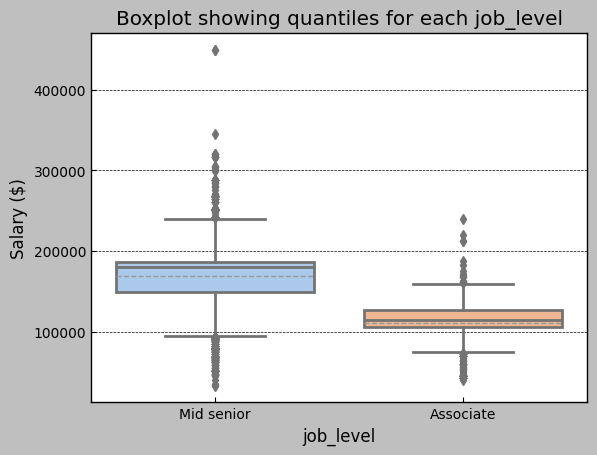

In [61]:
# Define function which help to visualize outliers
def boxplot(df, x,y):
    sns.boxplot(x=x, y=y, data=df, palette='pastel', showmeans=True, meanline=True)
    plt.xlabel(x)
    plt.ylabel('Salary ($)')
    plt.title(f'Boxplot showing quantiles for each {x}')
    plt.show()
boxplot(data_USA, 'job_level', 'Average_Salary ($)')

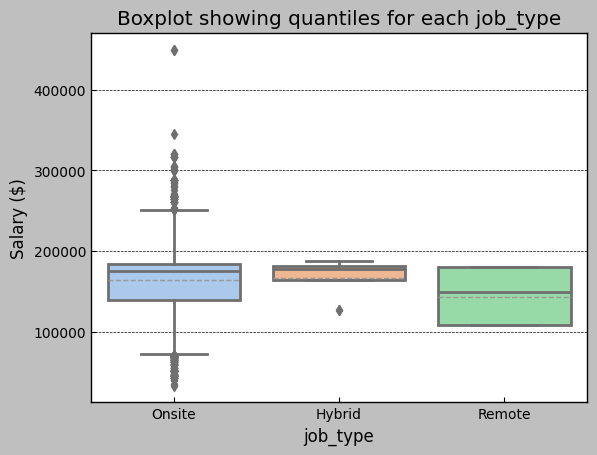

In [62]:
boxplot(data_USA, 'job_type', 'Average_Salary ($)')

In [63]:
data_USA['Average_Salary ($)'].describe()

count     10012.000000
mean     164183.020627
std       36554.948033
min       33280.000000
25%      139450.000000
50%      175595.894724
75%      184500.236190
max      450000.000000
Name: Average_Salary ($), dtype: float64

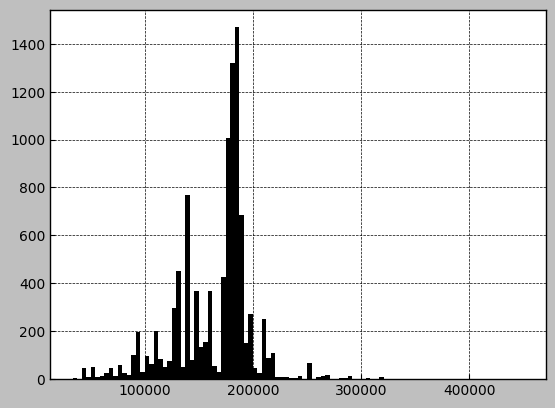

In [64]:
data_USA['Average_Salary ($)'].hist(bins=int(np.sqrt(len(data_USA['Average_Salary ($)']))))
plt.show()

In [65]:
# Remove outliers using Z-Score Method
from scipy import stats

Z_scores = np.abs(stats.zscore(data_USA['Average_Salary ($)']))
threshold = 3
data_USA_clean = data_USA[Z_scores < threshold]
data_USA_clean.shape

(9861, 4)

In [66]:
# Remove outlier using IQR
def remove_outliers(group):
    Q1 = group['Average_Salary ($)'].quantile(0.25)
    Q3 = group['Average_Salary ($)'].quantile(0.75)
    IQR = Q3 - Q1
    return group[(group['Average_Salary ($)'] >= (Q1 - 1.5 * IQR)) & (group['Average_Salary ($)'] <= (Q3 + 1.5 * IQR))]

cleaned_data = data_USA_clean.groupby('job_level').apply(remove_outliers).reset_index(drop=True)

cleaned_data.shape

(9391, 4)

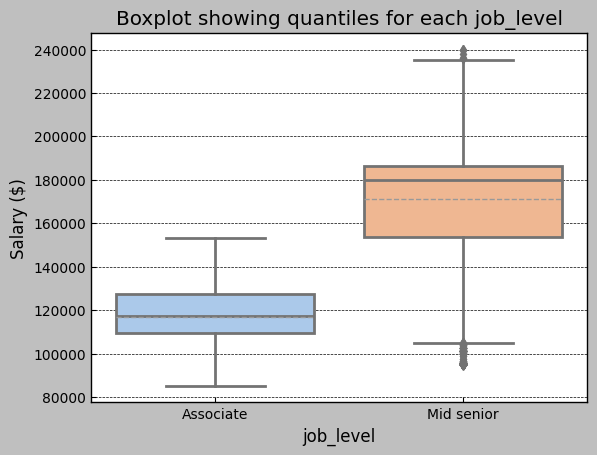

In [67]:
boxplot(cleaned_data, 'job_level', 'Average_Salary ($)')

In [68]:
cleaned_data.head()

,job_level,job_type,Average_Salary ($),state_code
0,Associate,Onsite,125563.333333,NY
1,Associate,Onsite,93600.000000,CA
2,Associate,Onsite,110306.662500,WA
3,Associate,Onsite,127398.311429,CA
4,Associate,Onsite,109678.823529,TX


In [69]:
# Converting categorical data into numeric data 
labelencoder = LabelEncoder()
cleaned_data['job_level_encode'] = labelencoder.fit_transform(cleaned_data['job_level'])

cleaned_data['job_type_encode'] = labelencoder.fit_transform(cleaned_data['job_type'])

In [70]:
cleaned_data.head()

,job_level,job_type,Average_Salary ($),state_code,job_level_encode,job_type_encode
0,Associate,Onsite,125563.333333,NY,0,1
1,Associate,Onsite,93600.000000,CA,0,1
2,Associate,Onsite,110306.662500,WA,0,1
3,Associate,Onsite,127398.311429,CA,0,1
4,Associate,Onsite,109678.823529,TX,0,1


In [71]:
cleaned_data.shape

(9391, 6)

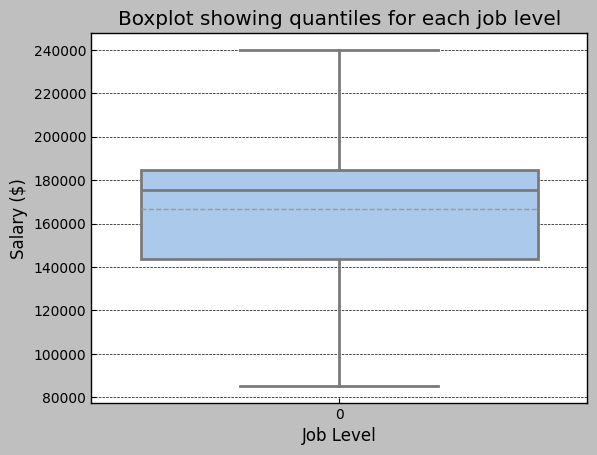

In [72]:
sns.boxplot(data=cleaned_data["Average_Salary ($)"], palette='pastel', showmeans=True, meanline=True)
plt.xlabel('Job Level')
plt.ylabel('Salary ($)')
plt.title('Boxplot showing quantiles for each job level')
plt.show()

In [73]:
# Converting state code to dummies variable 
dummies_data = pd.get_dummies(cleaned_data['state_code']).astype(int)

In [74]:
dummies_data

,AL,AR,AZ,CA,CO,CT,DE,FL,GA,HI,...,PA,RI,SC,SD,TN,TX,UT,VA,WA,WI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9389,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
final_data = pd.concat([cleaned_data, dummies_data], axis='columns')

In [76]:
final_data.head()

,job_level,job_type,Average_Salary ($),state_code,job_level_encode,job_type_encode,AL,AR,AZ,CA,...,PA,RI,SC,SD,TN,TX,UT,VA,WA,WI
0,Associate,Onsite,125563.333333,NY,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Associate,Onsite,93600.000000,CA,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Associate,Onsite,110306.662500,WA,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Associate,Onsite,127398.311429,CA,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Associate,Onsite,109678.823529,TX,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [77]:
final_data.drop(["job_level","job_type","state_code"], axis="columns", inplace=True)

In [78]:
final_data.head()

,Average_Salary ($),job_level_encode,job_type_encode,AL,AR,AZ,CA,CO,CT,DE,...,PA,RI,SC,SD,TN,TX,UT,VA,WA,WI
0,125563.333333,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,93600.000000,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,110306.662500,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,127398.311429,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,109678.823529,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [79]:
X = final_data.drop(["Average_Salary ($)"], axis="columns")
X

,job_level_encode,job_type_encode,AL,AR,AZ,CA,CO,CT,DE,FL,...,PA,RI,SC,SD,TN,TX,UT,VA,WA,WI
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9386,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9387,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9388,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9389,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
y = final_data["Average_Salary ($)"]
y

0       125563.333333
1        93600.000000
2       110306.662500
3       127398.311429
4       109678.823529
            ...      
9386    174526.878316
9387    139939.454545
9388    192100.000000
9389    175000.000000
9390    149013.893333
Name: Average_Salary ($), Length: 9391, dtype: float64

In [134]:
# Let's standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

In [139]:
y_predicted

array([154622.42765143, 151383.92765143, 125489.92765143, ...,
       178084.92765143, 183638.42765143, 154622.42765143])

In [140]:
r_sqr = model.score(X_test, y_test)
print(f"The accuracy of model is {r_sqr *100:.2f}%")

The accuracy of model is 76.91%


In [141]:
# Evaluate model using root mean square error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print(f"RMSE: {rmse}")

RMSE: 13774.594385912982


In [142]:
print(f"intercept: {model.intercept_}")

intercept: 166801.92765143333


In [87]:
def predict_price(state_code,job_level_encode,job_type_encode):    
    loc_index = np.where(X.columns==state_code)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = job_level_encode
    x[1] = job_type_encode
    if loc_index >= 0:
        x[loc_index] = 1
    
    x_df = pd.DataFrame([x], columns=X.columns)
    x_scaled = scaler.transform(x_df)

    return model.predict(x_scaled)[0]

In [184]:
state_code = input("Please enter state code(eg TX): ")
job_level = int(input("Please enter integer value 0 for Associate and 1 for Mid-Senior: "))
job_type = int(input("Please enter integer value 0 for Hybrid, 1 for Onsite and 2 for Remote: "))
print(f"The predicted annual salary is ${predict_price(state_code, job_level, job_type):.2f} ")

Please enter state code(eg TX): TX
Please enter integer value 0 for Associate and 1 for Mid-Senior: 0
Please enter integer value 0 for Hybrid, 1 for Onsite and 2 for Remote: 1
The predicted annual salary is $110519.87 


In [89]:
# Let's try with polynomial Regression

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Standardize the variales 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=10)

# Polynomial Features
degree = 2
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Initilize LinearRegression
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)


LinearRegression()

In [90]:
y_pred_poly = model_poly.predict(X_poly_test)
y_pred_poly

array([186436.5625, 102088.6875, 184595.6875, ..., 180174.3125,
       180174.3125, 149809.4375])

In [91]:
# Evaluate model using root mean square error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f"RMSE: {rmse}")

RMSE: 102704263547397.3


In [92]:
r2 = model_poly.score(X_poly_test, y_test)
print(r2)

-1.3594098758205536e+19


Both evaluation measures do not give appropriate results so, it looks like polynomial regression does not fit in our data

In [144]:
# Let's try our model with Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state=38)
model_decision_tree = DecisionTreeRegressor(criterion="friedman_mse", splitter='best')
model_decision_tree.fit(X_train1, y_train1)


DecisionTreeRegressor(criterion='friedman_mse')

In [145]:
y_predict = model_decision_tree.predict(X_test1)
y_predict

array([131981.94932432, 128745.24036458, 108750.        , ...,
       183329.26648165, 180069.66487988, 184411.50215825])

In [146]:
rmse = np.sqrt(mean_squared_error(y_test1, y_predict))
print(f"The RMSE: {rmse}")

The RMSE: 12774.609214850496


We can see that the value of RMSE in decision tree is less than in liner regression, so decision tree seems much accurate

In [147]:
r2_score = model_decision_tree.score(X_test1, y_test1)
print(f"The accuracy of model is {r2_score *100:.2f}%")

The accuracy of model is 79.87%


In [172]:
def predict_price(state_code,job_level_encode,job_type_encode):    
    loc_index = np.where(X.columns==state_code)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = job_level_encode
    x[1] = job_type_encode
    if loc_index >= 0:
        x[loc_index] = 1
    
    x_df = pd.DataFrame([x], columns=X.columns)
#     x_scaled = scaler.transform(x_df)

    return model_decision_tree.predict(x_df)[0]

In [185]:
state_code = input("Please enter state code(eg TX): ")
job_level = int(input("Please enter integer value 0 for Associate and 1 for Mid-Senior: "))
job_type = int(input("Please enter integer value 0 for Hybrid, 1 for Onsite and 2 for Remote: "))
print(f"The predicted annual salary is ${predict_price(state_code, job_level, job_type):.2f} ")

Please enter state code(eg TX): NY
Please enter integer value 0 for Associate and 1 for Mid-Senior: 1
Please enter integer value 0 for Hybrid, 1 for Onsite and 2 for Remote: 1
The predicted annual salary is $180069.66 


# By using cross-validation, let's test accuracy and make a comparison of other algorithms.

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'lasso_regression': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic'],
                'max_iter': [5000, 10000, 15000]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators':[100],
                'criterion' : ['squared_error','friedman_mse']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=112)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': f"{gs.best_score_: .2f}",
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.75,{'positive': True}
1,lasso_regression,0.75,"{'alpha': 1, 'max_iter': 10000, 'selection': '..."
2,decision_tree,0.78,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,random_forest,0.78,"{'criterion': 'friedman_mse', 'n_estimators': ..."


From the above results, we can conclude that decision trees perform with high accuracy.

 Let's look for the most demanding skills in job market

In [94]:
jobSkills = job_limit_df['job_skills'].str.split(",").explode().value_counts().reset_index()
topskills = jobSkills[jobSkills['count'] > 10]
topskills

,job_skills,count
0,Python,4430
1,SQL,4271
2,Communication,2493
3,Tableau,1653
4,AWS,1631
...,...,...
3020,GPUs,11
3021,Mission Critical,11
3022,UNIX Shell Scripting,11
3023,RShiny,11


In [95]:
# Define a function to calculate similarity between two strings
def similarity(string1, string2):
    return fuzz.token_sort_ratio(string1, string2)  # Using token_sort_ratio for better matching

# Dictionary to hold grouped counts
grouped_counts = {}

# Iterate over unique skills and their counts
for index, row in topskills.iterrows():
    skill = row['job_skills']
    count = row['count']
    # Check if the skill matches closely with any existing group
    matched = False
    for grouped_skill, grouped_count in grouped_counts.items():
        if similarity(skill, grouped_skill) > 80:  # Adjust the threshold as needed
            grouped_counts[grouped_skill] += count
            matched = True
            break
    if not matched:
        grouped_counts[skill] = count

# Print Dataframe with new skills and counts

sum_skills = pd.DataFrame(grouped_counts.items(), columns=['Job_skills', 'Count'])
sum_skills

,Job_skills,Count
0,Python,4841
1,SQL,4782
2,Communication,2701
3,Tableau,1705
4,AWS,1740
...,...,...
1837,KVM Units,11
1838,Quantitative Finance,11
1839,ClickHouse,11
1840,Mission Critical,11


In [96]:
top20_skills = sum_skills.head(20).sort_values(by=['Count'])
top20_skills

,Job_skills,Count
19,Scala,1034
16,Power BI,1036
15,Hadoop,1074
17,Snowflake,1075
14,Collaboration,1228
11,Teamwork,1300
10,Java,1425
6,R,1542
3,Tableau,1705
9,Spark,1733


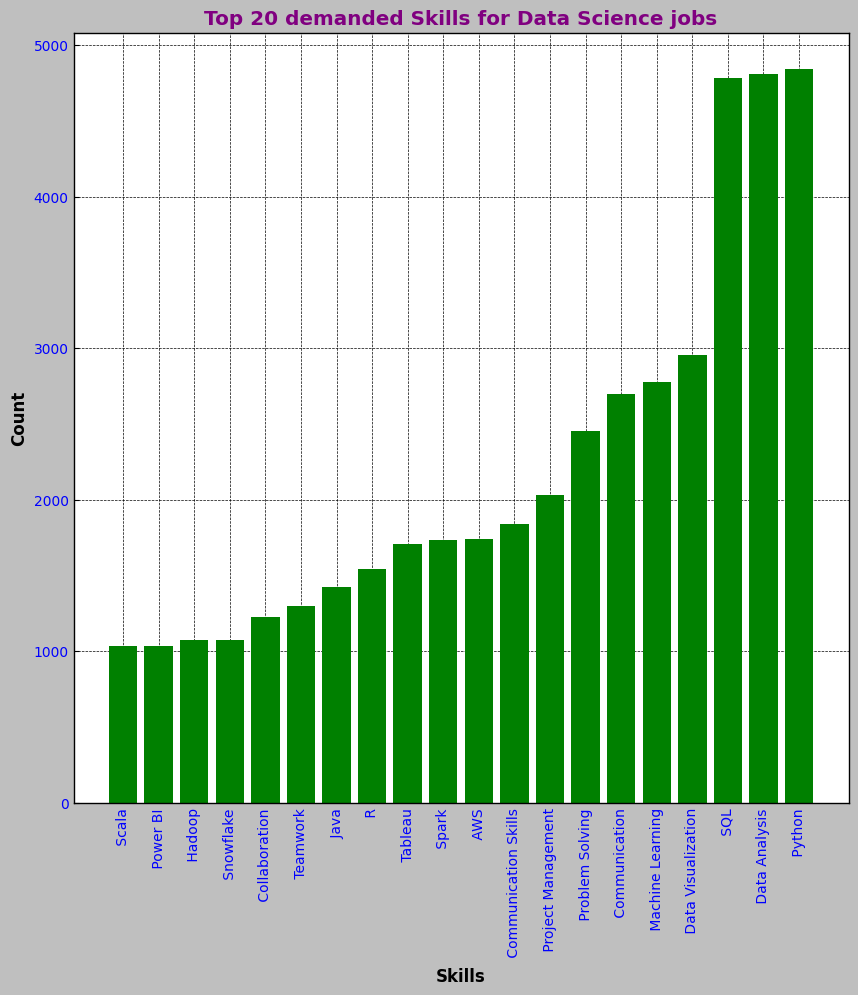

In [97]:
plt.style.use("grayscale")
plt.figure(figsize=(10,10))
plt.bar(top20_skills['Job_skills'], top20_skills['Count'], color="green")
plt.tick_params(labelcolor="blue")
plt.xticks(rotation=90)
plt.title("Top 20 demanded Skills for Data Science jobs", color="purple", fontweight = "bold")
plt.xlabel("Skills", weight="bold")
plt.ylabel("Count", weight="bold")
plt.show()

In [164]:
top50_skills = sum_skills.head(50).sort_values(by=['Count'])
top50_skills.shape

(50, 2)

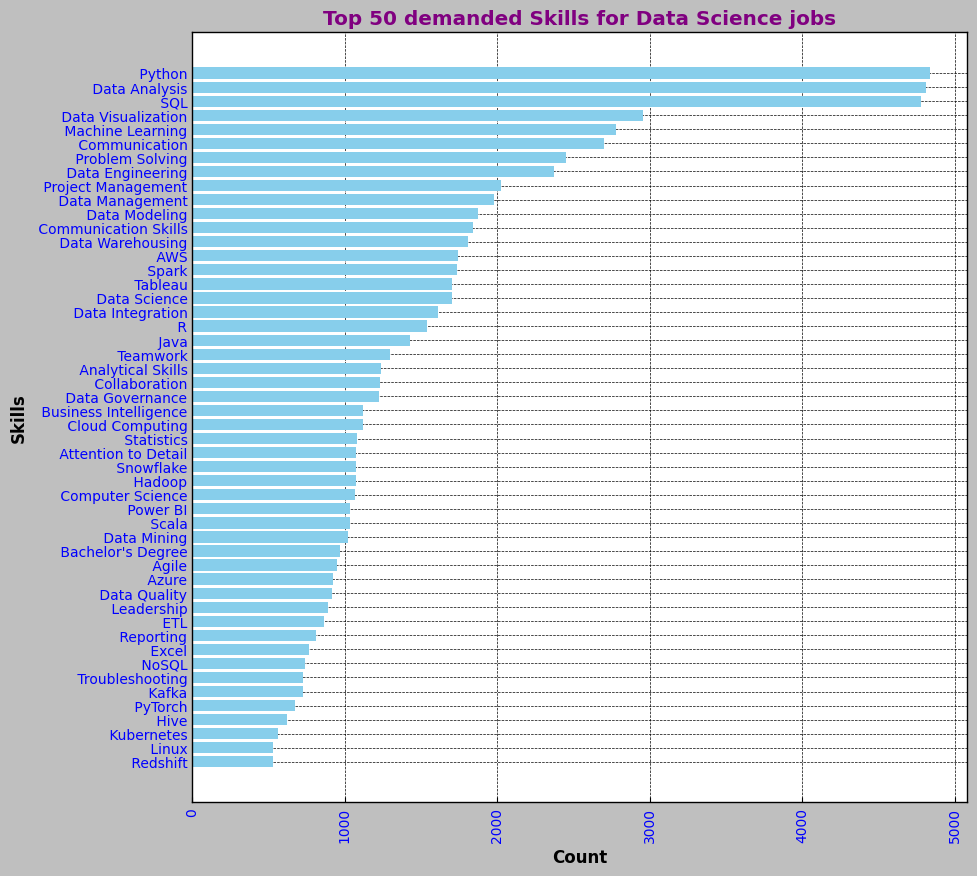

In [165]:
plt.style.use("grayscale")
plt.figure(figsize=(10,10))
plt.barh(top50_skills['Job_skills'], top50_skills['Count'], color="skyblue")
plt.tick_params(labelcolor="blue")
plt.xticks(rotation=90)
plt.title("Top 0 demanded Skills for Data Science jobs", color="purple", fontweight = "bold")
plt.xlabel("Count", weight="bold")
plt.ylabel("Skills", weight="bold")
plt.show()

In [166]:
skills_cloud = sum_skills.head(100).sort_values(by=['Count'], ascending=False)
skills_cloud

,Job_skills,Count
0,Python,4841
7,Data Analysis,4811
1,SQL,4782
5,Data Visualization,2957
8,Machine Learning,2777
...,...,...
99,Prioritization,293
93,MapReduce,287
94,CI/CD,284
96,Microsoft Azure,281


In [167]:
fig = px.treemap(skills_cloud, path=['Job_skills'], values='Count', width=1000, height = 1000)
fig.update_traces(textfont=dict(family='Arial', size=14, color='black'))
fig.show()

From the above visualization, we can conclude that "Python" is the most demanding skill along with SQL, "Data Analysis", "Data Visualization", "Machine Learning", "Communication", "Data Modeling", "Java", and so on.

https://www.kaggle.com/datasets/asaniczka/data-science-job-postings-and-skills?select=job_postings.csv